### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

<h3 style="color:red;">Q1, Answer:</h3><p style="color:green;">All relevant packages (APIs) and libraries are imported.</p>

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from bokeh.plotting import figure, output_file, show,output_notebook
# output_notebook()

#### 2. Read the 3 datasets into dataframes - 2.5 marks

<h3 style="color:red;">Q2, Answer:</h3> <p style="color:green;">The original "<i><b>Data.csv.</b></i>" is read into the "<i><b>rating</b></i>" data frame. <b>Note: that the csv file was renamed as "<i>ratingData.csv</i>" .</b></p><p style="color:green;">The "<i><b>item.csv.</b></i>" is read into the "<i><b>item</b></i>" data frame.</p><p style="color:green;">Answer: The "<i><b>user.csv.</b></i>" is read into the "<i><b>user</b></i>" data frame.</p>

In [2]:
# Import the dataset named 'worldBank-GDP20200409.csv'
rating = pd.read_csv("ratingData.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

rating.head()  # view the first 5 rows of the data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

<h3 style="color:red;">Q3-1a, Answer:</h3><p style="color:green;">The methods "<i><b>.info(), .shape</b></i>" and "<i><b>.describe()</b></i>" are applied to the data frame "<i><b>rating</b></i>"</p>

In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
rating.shape

(100000, 4)

In [7]:
rating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


<h3 style="color:red;">Q3-2a, Answer:</h3><p style="color:green;">The missing value for the data frame "<i><b>rating</b></i>" is obtained for each column. Additionaly, the missing values for the whole dataframe is investigated using the method "<i><b>.isnull().sum().sum()</b></i>".</p><p style="color:red;"><b>No missing values are found.<b></p>

In [8]:
# Count total NaN at each column in DataFrame
rating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [9]:
# Count all NaN in a DataFrame (both columns & Rows)
rating.isnull().sum().sum()

0

<h3 style="color:red;">Q3-1b, Answer:</h3><p style="color:green;">The methods "<i><b>.info(), .shape</b></i>" and "<i><b>.describe()</b></i>" are applied to the data frame "<i><b>item</b></i>"</p>

In [10]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
item.shape

(1681, 22)

In [12]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="color:red;">Q3-2b, Answer:</h3><p style="color:green;">The missing value for the data frame "<i><b>item</b></i>" is obtained for each column. Additionaly, the missing values for the whole dataframe is investigated using the method "<i><b>.isnull().sum().sum()</b></i>".</p><p style="color:red;"><b>No missing values are found.<b></p>

In [13]:
# Count total NaN at each column in DataFrame
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
# Count all NaN in a DataFrame (both columns & Rows)
item.isnull().sum().sum()

0

<h3 style="color:red;">Q3-1c, Answer:</h3><p style="color:green;">The methods "<i><b>.info(), .shape</b></i>" and "<i><b>.describe()</b></i>" are applied to the data frame "<i><b>user</b></i>"</p>

In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
user.shape

(943, 5)

In [17]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


<h3 style="color:red;">Q3-2c, Answer:</h3><p style="color:green;">The missing value for the data frame "<i><b>user</b></i>" is obtained for each column. Additionaly, the missing values for the whole dataframe is investigated using the method "<i><b>.isnull().sum().sum()</b></i>".</p><p style="color:red;"><b>No missing values are found.<b></p>

In [18]:
# Count total NaN at each column in DataFrame
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [19]:
# Count all NaN in a DataFrame (both columns & Rows)
user.isnull().sum().sum()

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [20]:
# use sum on the default axis

<h3 style="color:red;">Q4, Answer:</h3><p style="color:green;">Movies per genre. Two methods are used; <b>1.</b> By adding entries per column identified per item. <b>2.</b> By simply applying the "<i><b>.sum()</b></i>" method to the "<i><b>item</b></i>" data frame.</p>

In [21]:
item.columns.values

array(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [22]:
print("unknown:",item["unknown"].sum())
print("Action:",item["Action"].sum())
print("Adventure:",item["Adventure"].sum())
print("Animation:",item["Animation"].sum())
print("Childrens:",item["Childrens"].sum())
print("Comedy:",item["Comedy"].sum())
print("Crime:",item["Crime"].sum())
print("Documentary:",item["Documentary"].sum())
print("Drama:",item["Drama"].sum())
print("Fantasy:",item["Fantasy"].sum())
print("Film-Noir:",item["Film-Noir"].sum())
print("Horror:",item["Horror"].sum())
print("Musical:",item["Musical"].sum())
print("Mystery:",item["Mystery"].sum())
print("Romance:",item["Romance"].sum())
print("Sci-Fi:",item["Sci-Fi"].sum())
print("Thriller:",item["Thriller"].sum())
print("War:",item["War"].sum())
print("Western:",item["Western"].sum())


unknown: 1
Action: 251
Adventure: 135
Animation: 42
Childrens: 122
Comedy: 505
Crime: 109
Documentary: 50
Drama: 725
Fantasy: 22
Film-Noir: 24
Horror: 92
Musical: 56
Mystery: 61
Romance: 247
Sci-Fi: 101
Thriller: 251
War: 71
Western: 27


<p style="color:green;">By simply applying the "<i><b>.sum()</b></i>" method to the "<i><b>item</b></i>" data frame.</p>

In [23]:
item.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [24]:
#hint: use sum on the axis = 1

In [25]:
col_list = list(item)
print(col_list)

['movie id', 'movie title', 'release date', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [26]:
col_list.remove("movie id")
col_list

['movie title',
 'release date',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

<h3 style="color:red;">Q5, Answer:</h3><p style="color:green;">The data frame <i><b>movieManyGenre</b></i> contains the movies found to have more than one genre. All entries of the <i><b>item</b></i> data frame that have more than one genre are displayed below.</p>

In [27]:
# Do you remember this?
# d3=d2[d2['unemployment']>8.5]                #extracting the part of the dataframe d2 to a new dataframe
# d3
movieManyGenre=item[item[col_list].sum(axis=1)>1]
movieManyGenre

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [28]:
# Do you remember this?
# d3=d2[d2['unemployment']>8.5]                #extracting the part of the dataframe d2 to a new dataframe
# d3
unknownGenreMovies=item[item["unknown"]==1]
unknownGenreMovies

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3 style="color:red;">Q6, Answer:</h3><p style="color:green;">In <b>Question 4</b> it was determined that the movie having an "unknown" genre is only one. In the previous line, such movie is located. Once it was located, in the following lines it is eliminated using the "<i><b>.drop([])</b></i>" method. The result is verified using the "<i><b>.shape</b></i>" and "<i><b>.iloc[:,;]</b></i>" methods.</p>

In [29]:
newItemdf=item.drop([1371])

In [30]:
item.shape

(1681, 22)

In [31]:
item.iloc[1369:1374, 0:22]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1369,1371,"Machine, The",01-Jan-1994,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1370,1372,"Stranger, The",01-Jan-1994,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1374,Falling in Love Again,01-Jan-1980,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1373,1375,"Cement Garden, The",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
newItemdf.shape

(1680, 22)

In [33]:
newItemdf.iloc[1369:1373, 0:22]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1369,1371,"Machine, The",01-Jan-1994,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1370,1372,"Stranger, The",01-Jan-1994,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1374,Falling in Love Again,01-Jan-1980,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1373,1375,"Cement Garden, The",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [34]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date.
#       You can use str.split() as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

<h3 style="color:red;">Q7a, Answer:</h3><p style="color:green;">"<i><b>rating</b></i>" displayed in a "<i><b>countplot</i></b>".</p>

In [35]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])
# print(a[9:])
# print(a[-4])

brown
brown
brown


In [36]:
#your answers here

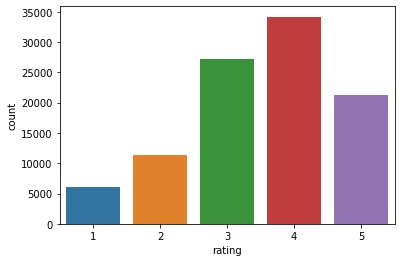

In [37]:
sns.countplot(rating["rating"]);

<h3 style="color:red;">Q7b, Answer:</h3><p style="color:green;"><b>"number of movies"</b> in a <b>year</b>.</p><p style="color:red;"><b>a new data frame was created "<i><b>itemExtended</i></b>"</b> IT WILL BE LATER USED IN <b>QUESTION 8</b>.</p>

In [38]:
#sns.distplot(item["release date".split(' ')[1]], kde=False);
dfReleaseDate = pd.DataFrame(columns=["year"])
for i in range(1681):
    dfReleaseDateEntry = item["release date"][i]
    dfReleaseDateEntry = dfReleaseDateEntry[7:]
    dfReleaseDateEntryInt = int(dfReleaseDateEntry)
    dfReleaseDate.loc[i] =  dfReleaseDateEntryInt

#dfReleaseDate
itemExtended = item.join(dfReleaseDate,how='right')
itemExtended.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


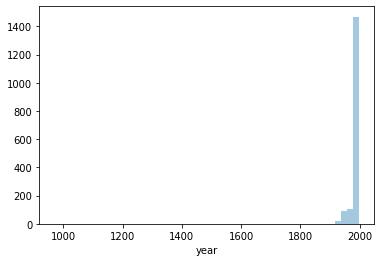

In [39]:
sns.distplot(itemExtended["year"], kde=False);

<p style="color:red;"><b>The data frame "<i><b>item</i></b>" has an erroneous entry of a year with a value of <b>"year: 971"</b> such row will be later dropped while answering <b>Question 8</b>. This is the reason the year axis starts from around 1000 </p>

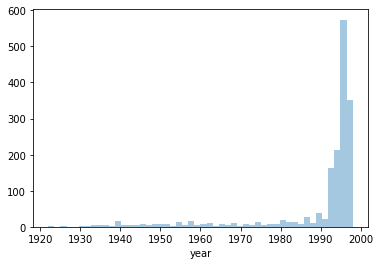

In [40]:
filtered = itemExtended[(itemExtended["year"] >= 1920) & (itemExtended["year"] < 2020)]
sns.distplot(filtered["year"], kde=False);

<h3 style="color:red;">Q7c, Answer:</h3><p style="color:green;"><b>"Age of users"</b>" in a <i><b>distplot</i></b>" graph.</p>

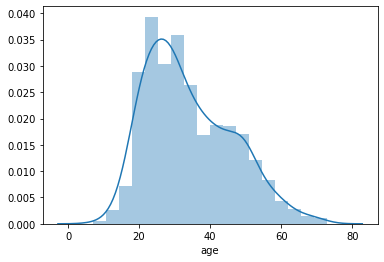

In [41]:
sns.distplot(user["age"]);

<h3 style="color:red;">Q7d, Answer:</h3><p style="color:green;"><b>"Gender of users"</b>" in a <i><b>countplot</i></b>" graph.</p>

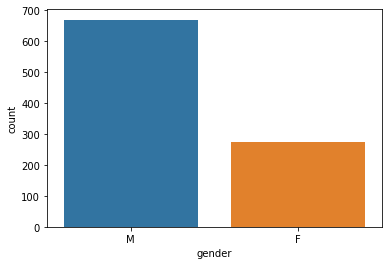

In [42]:
sns.countplot(user["gender"]);

<h3 style="color:red;">Q7d, Answer:</h3><p style="color:green;"><b>"Occupation of users"</b>" in a <i><b>countplot</i></b>" graph. I would have liked to correct the x axis, but no time.</p>

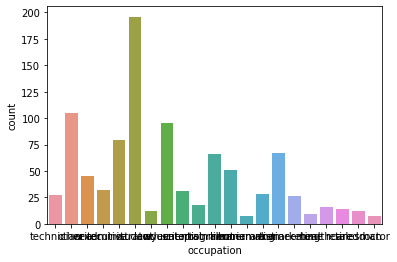

In [43]:
sns.countplot(user["occupation"]);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [44]:
#Your answer here

<h3 style="color:red;">AS MENTIONED BEFORE IN QUESTION 7, part b THE DATAFRAME "<i><b>itemExtended</b></i>" IS USED HERE AGAIN, THIS WAS DOND PURPOSEFULLY.</h3>

In [45]:
itemExtended

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


In [46]:
#itemExtended = rating.groupby(['year'], as_index=False).count()
#itemExtended = rating.groupby(['Western']).count()
itemExtendedYear = itemExtended.groupby(['year'], as_index=False).count()
itemExtendedYear

,year,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,971,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1922,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1926,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1930,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1931,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1994,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
68,1995,219,219,219,219,219,219,219,219,219,...,219,219,219,219,219,219,219,219,219,219
69,1996,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
70,1997,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286


In [47]:
itemExtendedYearClean = itemExtendedYear.drop([0])
itemExtendedYearClean

,year,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1922,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1926,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1930,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1931,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1932,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1994,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
68,1995,219,219,219,219,219,219,219,219,219,...,219,219,219,219,219,219,219,219,219,219
69,1996,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
70,1997,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286


<h3 style="color:red;">Q8, Answer:</h3><p style="color:green;"> Popularity of genres over the years is obtained with a slightly different approach to the one suggested in the hint. "<i><b>pairplots</i></b>" are used, as the data frame used allows this. In fact I think this approach is cleaner to visualize the variation from genres respect to time, i.e., "year".</p>

In [48]:
itemExtendedYearClean.columns

Index(['year', 'movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

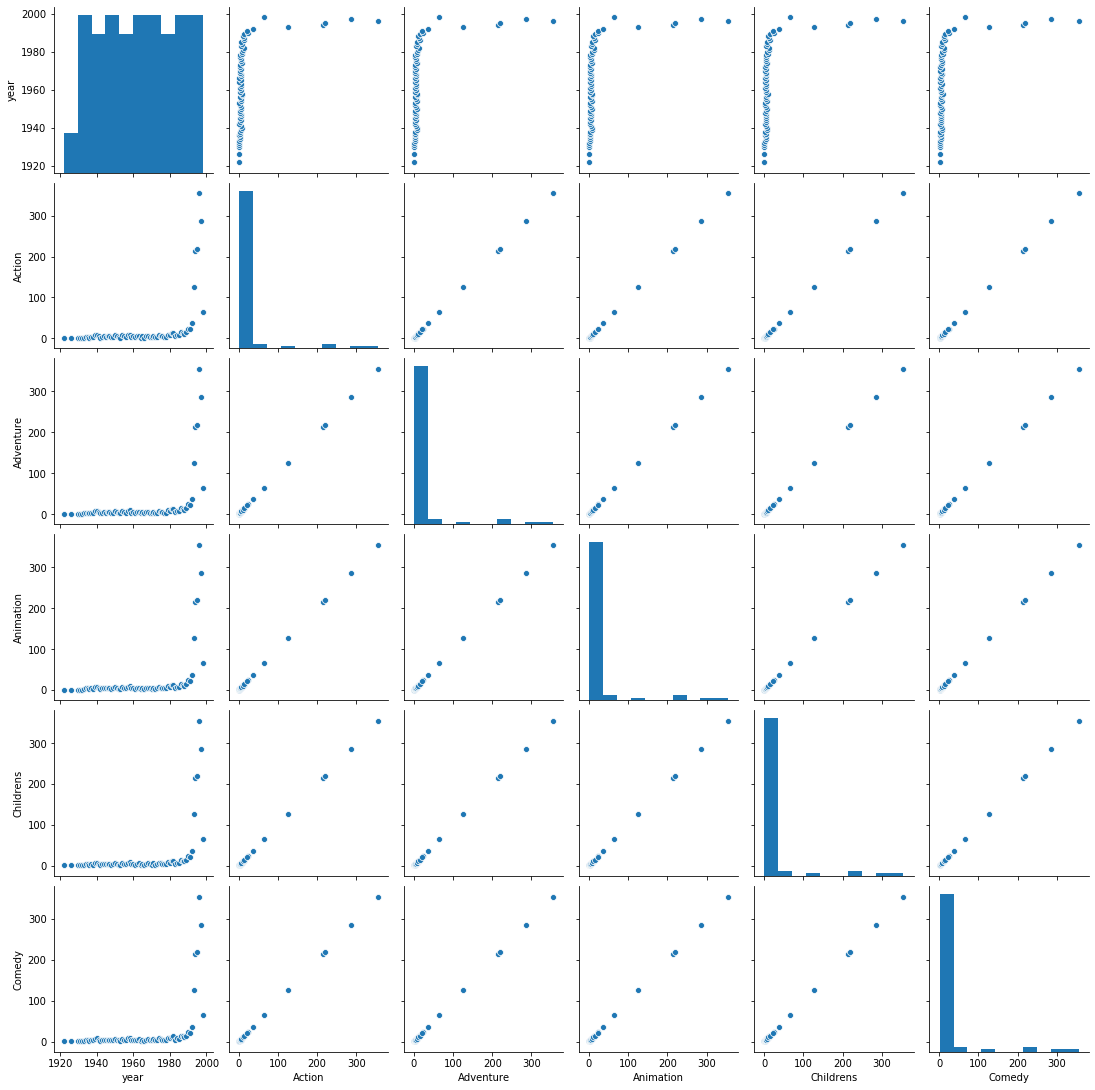

In [49]:
sns.pairplot(itemExtendedYearClean[['year','Action','Adventure', 'Animation', 'Childrens','Comedy']]);

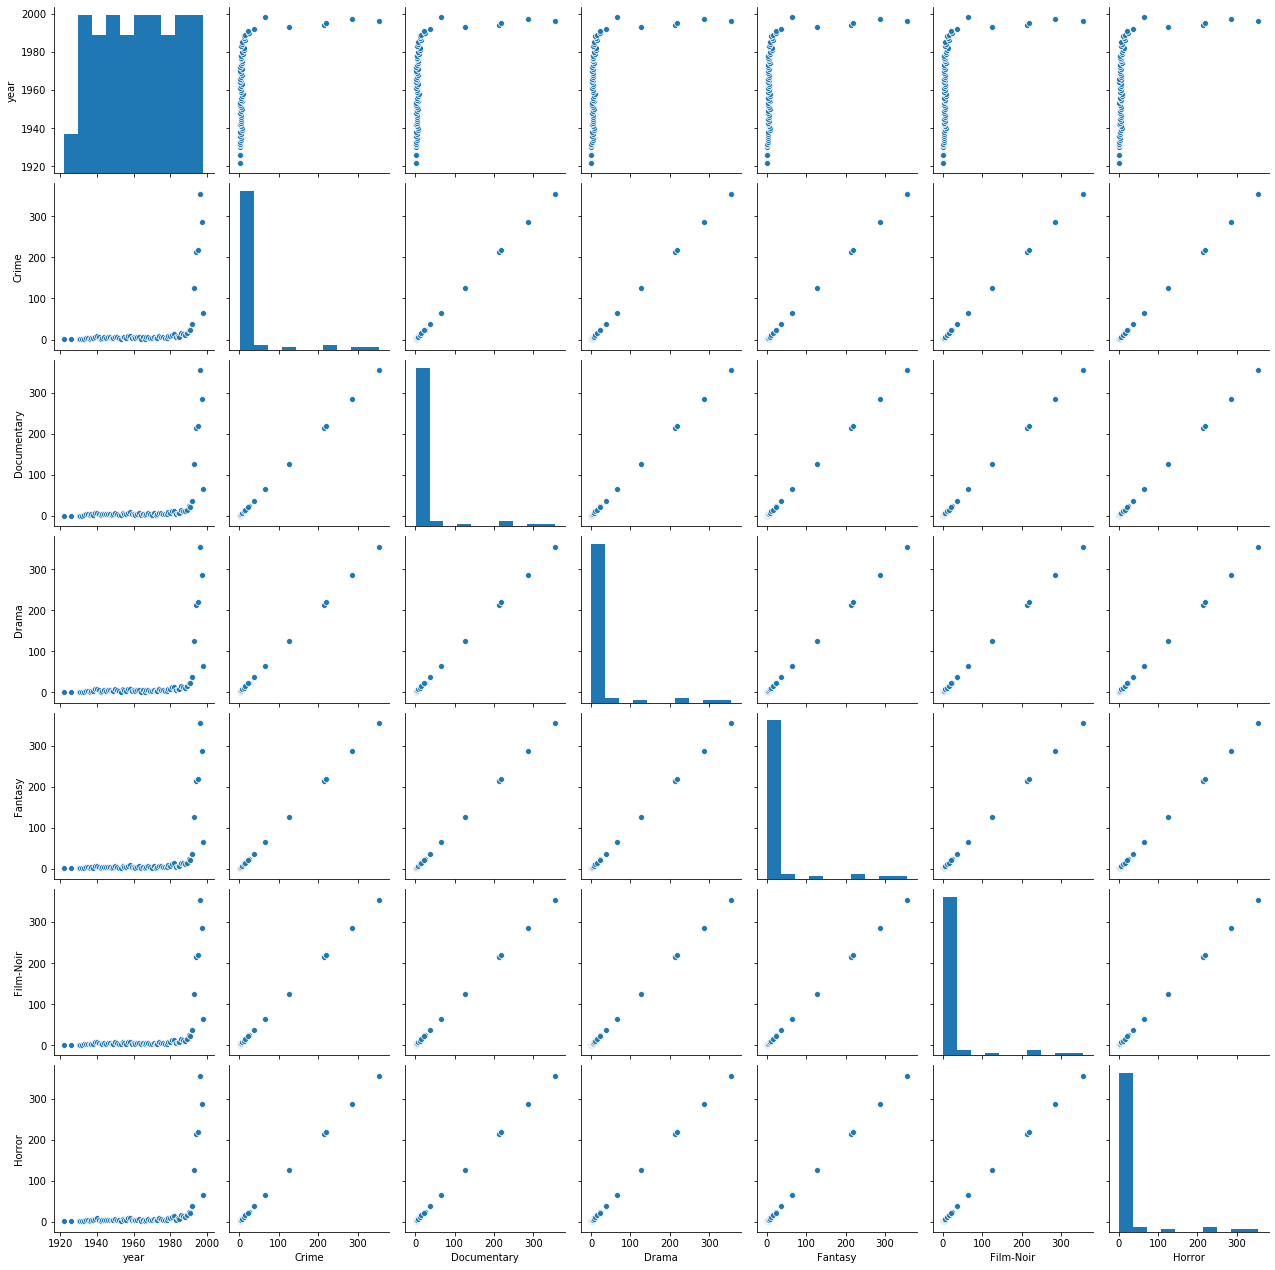

In [50]:
sns.pairplot(itemExtendedYearClean[['year','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror']]);

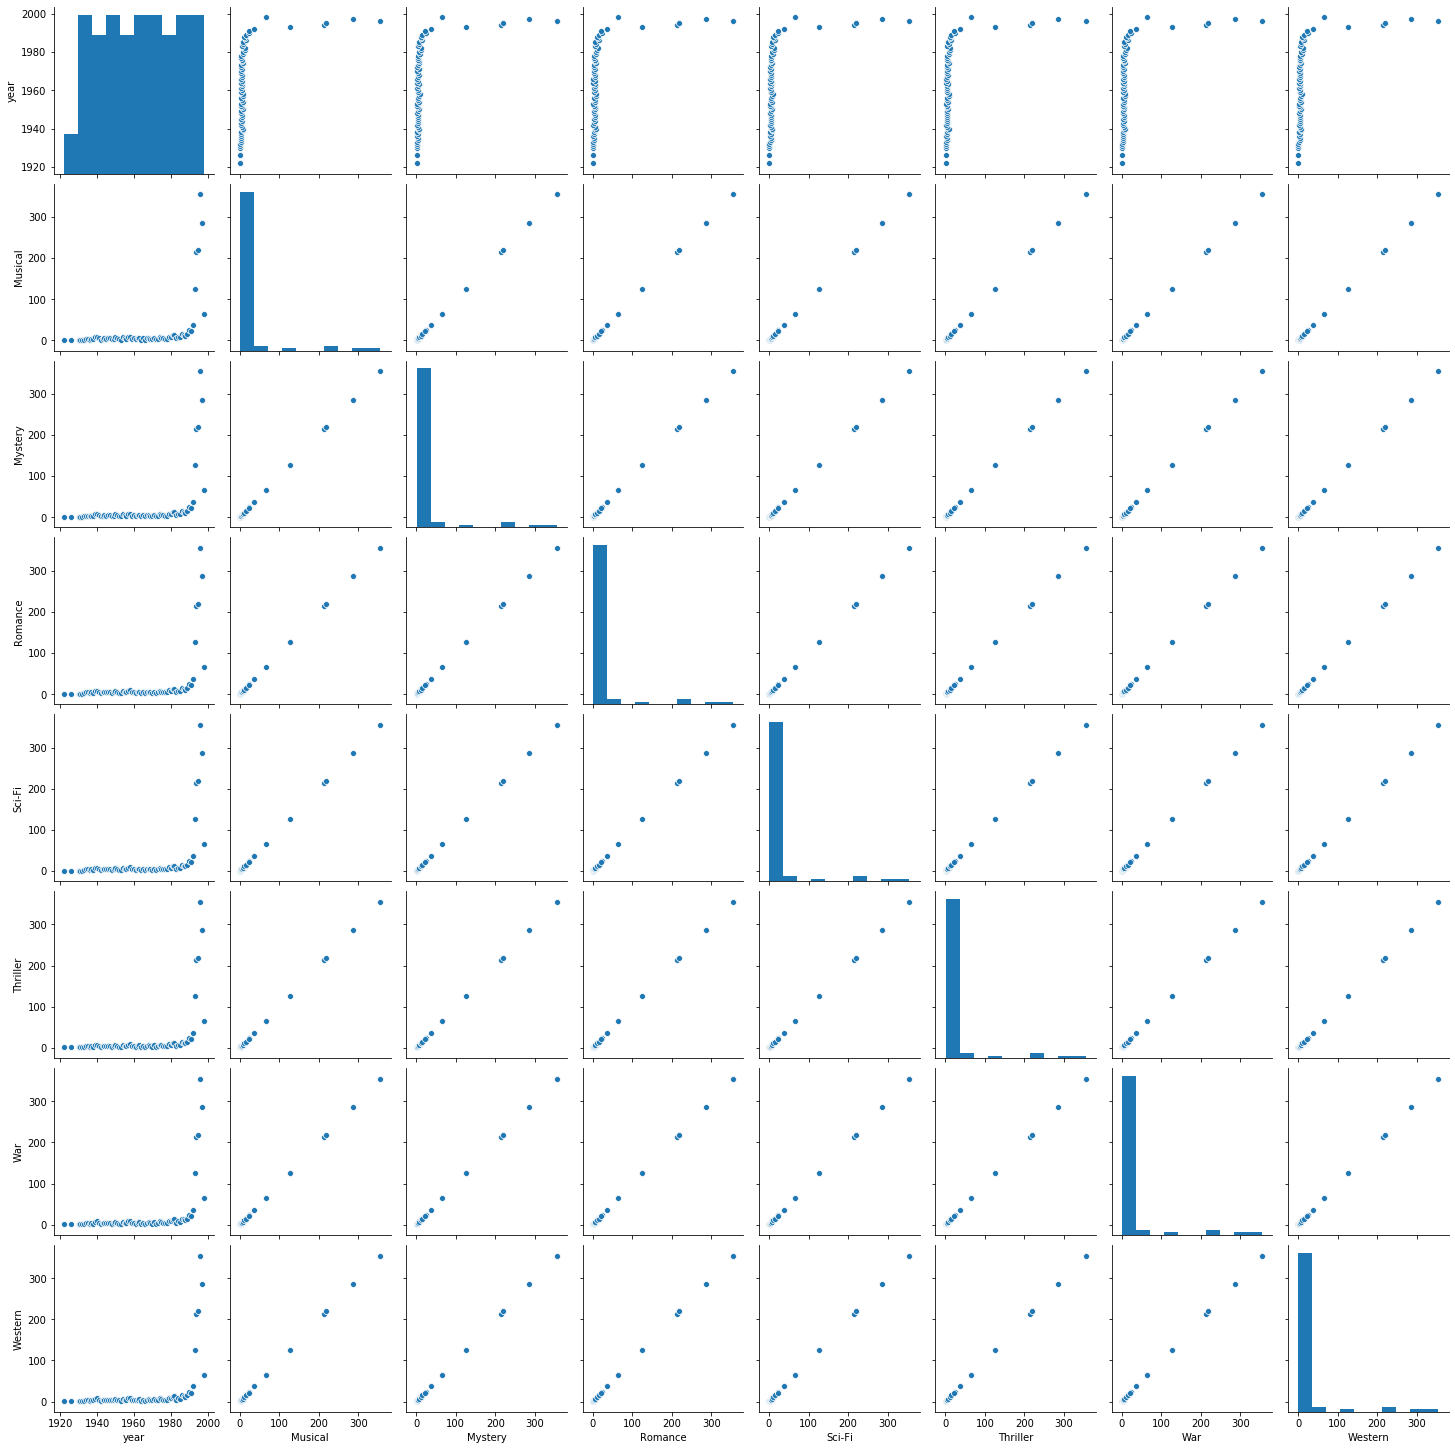

In [51]:
sns.pairplot(itemExtendedYearClean[['year','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]);

In [52]:
# sns.pairplot(itemExtendedYearClean[['year','Action','Adventure','Animation','Childrens','Comedy',
#                                     'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror',
#                                     'Musical', 'Mystery','Romance','Sci-Fi','Thriller','War','Western']]);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [53]:
#your answer here

In [54]:
# rating.head()

In [55]:
#movieByNumRatings = rating.groupby(['movie id'], as_index=False).count()
movieByNumRatings = rating.groupby(['movie id']).count()
movieByNumRatings = movieByNumRatings[movieByNumRatings["rating"]>100]
movieByNumRatings.shape

(334, 3)

In [56]:
# Obtaining a list of the movie titles
for i in range (335):
    movieList=list(movieByNumRatings.index)
type(movieList)

list

In [57]:
# dfMovieTitles
# pd.DataFrame(q_list, columns=['q_data'])
dfMovieList = pd.DataFrame(movieList, columns=["movie id"])
# dfMovieList

In [58]:
dfMoviesMin100ratings = pd.merge(rating,dfMovieList,how="inner",on="movie id")
# dfMoviesMin100ratings

In [59]:
dfMoviesMin100meanRating = dfMoviesMin100ratings.groupby(["movie id"], as_index=False).mean()
dfMoviesMin100meanRating.shape

(334, 4)

In [60]:
#dfMoviesMin100meanRatingMax = dfMoviesMin100meanRating.groupby(["rating"], as_index=False, sort=True).max()
dfMoviesMin100meanRatingMax = dfMoviesMin100meanRating.groupby(["rating"], as_index=False).max()
dfMoviesMin100meanRatingMax.shape

(331, 4)

<h3 style="color:red;">Q9, Answer:</h3><p style="color:green;">The <b>"Top 25 movies by rating"</b>", despite the index for the first one is 330, this one corresponds to the movie with the highest rating. The index is, in other words, inversed, something that would be desirable to modiflied, but I had no more time. Despite of this detail, the desired outcome was obtained.</p>

In [61]:
dfTop25Movies = dfMoviesMin100meanRatingMax.sort_values(["rating"], ascending=[False])
Top25 = dfTop25Movies.head(25)
Top25

,rating,movie id,user id,timestamp
330,4.491071,408,443.142857,8.823304e+08
329,4.466443,318,469.714765,8.834050e+08
328,4.466102,169,454.483051,8.828888e+08
327,4.456790,483,471.831276,8.834745e+08
326,4.445230,64,441.187279,8.826119e+08
325,4.387560,603,468.650718,8.837371e+08
324,4.385768,12,448.382022,8.829016e+08
323,4.358491,50,471.384220,8.830261e+08
322,4.344000,178,453.552000,8.828963e+08
321,4.292929,134,466.853535,8.833150e+08


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



### Question 10 is not fully clear, "Data.csv" (the file containing the ratings) and "user.csv" both contain a numerical identification of the movie, but such information is missing in the "item.csv" file. The first two can somhow be combined, as they share information. But item doesn't, and it is precisely "item.csv" the one that has the information regarding the genre. So if in question 10 i am requested the amount of women that like certain movie genre, then I don't see a possible solution for this.